<a href="https://colab.research.google.com/github/slomah2011/AI/blob/main/c_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from fcmeans import FCM
import seaborn as sns

In [ ]:
df= pd.read_csv("cardio.csv")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.describe

<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

     

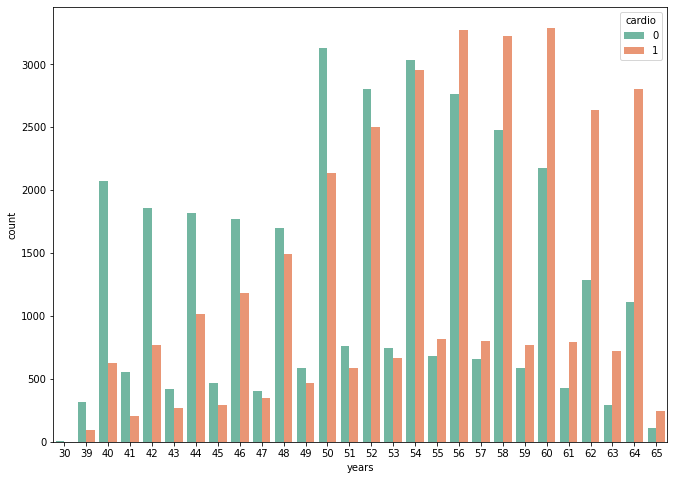

In [ ]:
#Age is measured in days, height is in centimeters
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

In [ ]:
df.drop(['age','id','cardio'] ,axis=1)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,2,168,62.0,110,80,1,1,0,0,1
1,1,156,85.0,140,90,3,1,0,0,1
2,1,165,64.0,130,70,3,1,0,0,0
3,2,169,82.0,150,100,1,1,0,0,1
4,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,2,168,76.0,120,80,1,1,1,0,1
69996,1,158,126.0,140,90,2,2,0,0,1
69997,2,183,105.0,180,90,3,1,0,1,0
69998,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
len(df)

70000

<function matplotlib.pyplot.show(*args, **kw)>

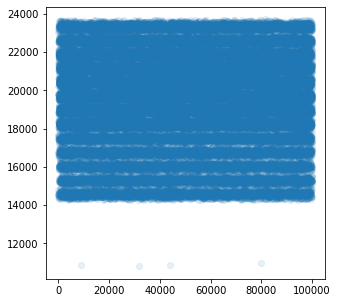

In [ ]:
x = df.iloc[:,:].values
plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1], alpha=.1)
plt.show


In [ ]:
fcm=FCM(n_clusters=2)
fcm.fit(x)


In [ ]:
 # outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(x)


In [ ]:
fcm_centers

array([[2.35875956e+04, 1.94607214e+04, 1.35021411e+00, 1.64402039e+02,
        7.41971312e+01, 1.28024312e+02, 9.70417075e+01, 1.36265204e+00,
        1.22464148e+00, 8.98885376e-02, 5.38909062e-02, 8.03098919e-01,
        4.97470750e-01],
       [7.62927734e+04, 1.94805616e+04, 1.35013469e+00, 1.64313585e+02,
        7.41856480e+01, 1.29326750e+02, 9.59213430e+01, 1.37229367e+00,
        1.22846489e+00, 8.69301524e-02, 5.38744219e-02, 8.05395527e-01,
        5.00963185e-01]])

In [ ]:
np.unique(fcm_labels)

array([0, 1])

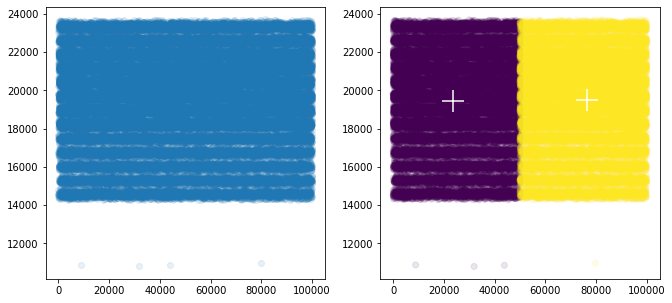

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(x[:,0], x[:,1], alpha=.1)
axes[1].scatter(x[:,0], x[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

In [ ]:
data=pd.read_csv("cardio.csv")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
class_label=data['cardio']

In [ ]:
def acc():
    count=0
    for x in range(len(data)):
        if fcm_labels[x]==class_label[x]:
                   count+=1
    return (count/len(data))*100

In [ ]:
print("Accuracy=" , acc())

Accuracy= 50.111428571428576


In [ ]:
id=data['id']

In [ ]:
def defectIds():
    for x in range(len(data)):
        if fcm_labels[x]!=class_label[x]:
            print(id[x])


In [ ]:
#bad IDs classfied
defectIds()

Streaming output truncated to the last 5000 lines.
85558
85560
85562
85564
85565
85569
85571
85573
85575
85576
85580
85587
85592
85593
85595
85597
85598
85602
85606
85607
85608
85609
85610
85615
85616
85620
85622
85625
85626
85629
85632
85636
85639
85646
85648
85656
85658
85659
85662
85669
85670
85671
85672
85674
85677
85678
85682
85683
85684
85688
85690
85698
85700
85702
85706
85707
85708
85712
85714
85716
85718
85725
85726
85728
85731
85732
85733
85734
85737
85739
85743
85745
85748
85749
85752
85754
85755
85767
85770
85771
85775
85777
85779
85781
85789
85790
85791
85792
85795
85796
85800
85809
85813
85817
85818
85824
85827
85828
85832
85836
85838
85849
85850
85853
85858
85859
85860
85865
85866
85872
85876
85879
85880
85881
85883
85885
85886
85890
85891
85894
85899
85900
85902
85906
85909
85911
85912
85916
85920
85924
85928
85932
85938
85939
85942
85944
85947
85948
85950
85954
85956
85957
85958
85967
85968
85970
85971
85972
85973
85974
85975
85976
85977
85982
85984
85985
85988
85990
8

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X= df
y=data['cardio']
  
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.20, 
                                   shuffle=True)

NameError: ignored

In [ ]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
svc= SVC()
clf= SVC(kernel='linear')
####
clf.fit(X_,y)

####
clf.predict[X]
print('accuarcy', accuracy_score(y_test,y_pred)*100)